In [2]:
import zipfile
zip_ref=zipfile.ZipFile('/content/train-20240914T124804Z-001.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

zip_ref=zipfile.ZipFile('/content/test-20240914T124825Z-001.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

zip_ref=zipfile.ZipFile('/content/val-20240914T124759Z-001.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt

In [4]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/val',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 1951 files belonging to 4 classes.
Found 324 files belonging to 4 classes.


In [25]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4,activation='softmax'))

In [26]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,388 (56.64 MB)

 Trainable params: 14,847,940 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.5361 - loss: 9.0270 - val_accuracy: 0.4012 - val_loss: 22.5017
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.7562 - loss: 3.2727 - val_accuracy: 0.5957 - val_loss: 4.4815
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.7938 - loss: 2.0520 - val_accuracy: 0.4938 - val_loss: 7.8083
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8321 - loss: 1.1208 - val_accuracy: 0.6049 - val_loss: 3.9262
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.8873 - loss: 0.5914 - val_accuracy: 0.6821 - val_loss: 3.0393
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.8943 - loss: 0.6640 - val_accuracy: 0.6944 - val_loss: 3.4095
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9089 - loss: 0.4859 - val_accuracy: 0.5957 - val_loss: 6.6452
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8992 - loss: 0.5293 - val_accuracy: 0.

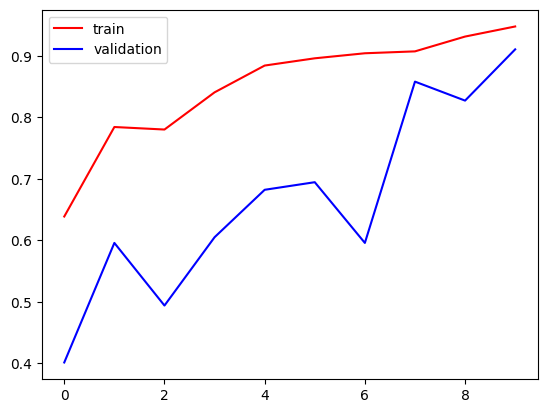

In [29]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

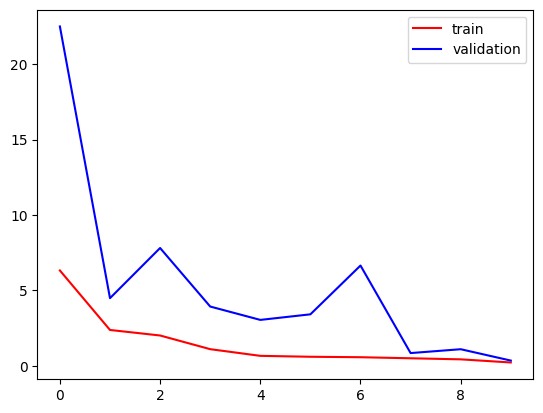

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
#

#Prediction on test_data

In [31]:
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 36 files belonging to 5 classes.


In [37]:
prediction=model.predict(test_ds)
predictions=prediction.argmax(axis=1)
predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step


array([1, 3, 2, 1, 1, 1, 2, 1, 3, 2, 3, 1, 0, 1, 3, 1, 3, 2, 3, 0, 1, 0,
       0, 0, 2, 0, 2, 2, 3, 2, 3, 1, 0, 2, 0, 2])

In [38]:
test_acc=model.evaluate(test_ds)
print(test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.4711 - loss: nan
[nan, 0.4722222089767456]


#Prediction on unseen data

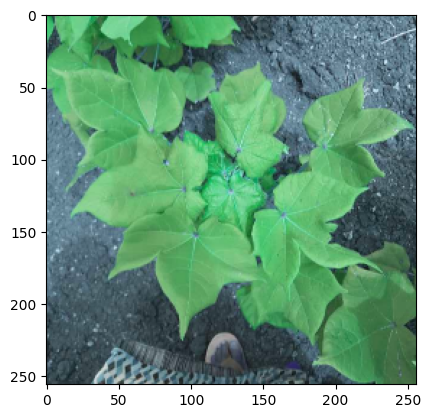

In [46]:
import cv2
test_img=cv2.imread('/content/dd (100)_iaip.jpg')
test_img=cv2.resize(test_img,(256,256))
#test_img=test_img/255.0
plt.imshow(test_img)

In [48]:
test_input=test_img.reshape((1,256,256,3))
prediction=model.predict(test_input)
predictions=prediction.argmax(axis=1)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([3])

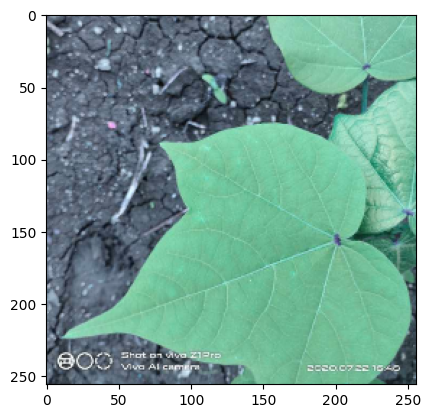

In [49]:
import cv2
test_img=cv2.imread('/content/d (10)_iaip.jpg')
test_img=cv2.resize(test_img,(256,256))
#test_img=test_img/255.0
plt.imshow(test_img)

In [50]:
test_input=test_img.reshape((1,256,256,3))
prediction=model.predict(test_input)
predictions=prediction.argmax(axis=1)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([2])